In [1]:
# importing libraries
from bs4 import BeautifulSoup
import requests

#### Ejercicio 1: Acceder a una web simple con requests y parsear con beautiful soup
Vamos a acceder a una página simple. Veremos su estructura y cómo beautiful soup genera un objeto con dicha estructura

__1. Accedemos a la página y comprobamos el código de estado de la operación --> requests.get()__

In [2]:
url = "https://www.utm.edu/staff/jlofaro/Joe%20Lofaro's%20Dive%20Shop%20Project/basic.html"
page = requests.get(url)
print(f"status code = {page.status_code}")

status code = 200


__2. Comprobamos el contenido de lo que hemos recibido (atributo .text de nuestra respuesta)__

In [3]:
print(f"Tipo del contenido de 'page' = {type(page.text)}\n")
print(page.text)

Tipo del contenido de 'page' = <class 'str'>

ï»¿<!DOCTYPE html PUBLIC " - //W3C//DTD xhtml 1.0 Strict//EN"
	"http://www.w3.org/1999/xhtml">
		<head>
		   <title> The Most Basic Web Page in the World</title>
		   <meta http-equiv="Content-Type"
			content+"text/html; charset=utf-8/>
		   </head>
		   <body>
		     <h1>The Most Basic Web Page i the World</h1>
		     <p>This is a very simple web page to get you started. 
			Hopefully you will get to see how the markup that drives 
			the page relates to the end result that you can see on
			screen.</p>
		     <p>This is another paragraph, by the way. Just to show how it works.</p>
		   </body>
</html>


__3. Creamos un objeto Beatiful Soup, diciéndole que el texto recibido es en verdad un HTML y que lo tiene que parsear como tal__

In [4]:
soup = BeautifulSoup(page.text, 'html.parser')
print(f"Tipo de 'soup' = {type(soup)}\n")
print(soup)

Tipo de 'soup' = <class 'bs4.BeautifulSoup'>

ï»¿<!DOCTYPE html PUBLIC " - //W3C//DTD xhtml 1.0 Strict//EN"
	"http://www.w3.org/1999/xhtml">

<head>
<title> The Most Basic Web Page in the World</title>
<meta charset="utf-8" content+"text="" html;="" http-equiv="Content-Type"/>
</head>
<body>
<h1>The Most Basic Web Page i the World</h1>
<p>This is a very simple web page to get you started. 
			Hopefully you will get to see how the markup that drives 
			the page relates to the end result that you can see on
			screen.</p>
<p>This is another paragraph, by the way. Just to show how it works.</p>
</body>



__4. Listamos todos los tags presentes en el documento (accesibles desde el objeto soup) --> find_all()__

In [5]:
tags = [tag.name for tag in soup.find_all()]
print(f"Listado de tags en el documento = {tags}")

Listado de tags en el documento = ['head', 'title', 'meta', 'body', 'h1', 'p', 'p']


__5. Accedemos a un tag en concreto, y luego accedemos a su contenido (su texto)__

In [6]:
print("Tag concreto --title-- :")
print(soup.title)

Tag concreto --title-- :
<title> The Most Basic Web Page in the World</title>


In [7]:
print("Sólo el texto del tag --title-- :")
print(soup.title.text)

Sólo el texto del tag --title-- :
 The Most Basic Web Page in the World


__6. Accedemos a todos los tags de un tipo concreto, y luego vemos sus contenidos --> find_all()__

In [8]:
p_tags = soup.find_all("p")
print("Listado de todos los tags <p>:")
print(p_tags)

Listado de todos los tags <p>:
[<p>This is a very simple web page to get you started. 
			Hopefully you will get to see how the markup that drives 
			the page relates to the end result that you can see on
			screen.</p>, <p>This is another paragraph, by the way. Just to show how it works.</p>]


In [9]:
print("Listado de los contenidos de todos los tags <p>:")
p_contents = []
for p_tag in soup.find_all("p"):
    p_contents.append(p_tag.text)
print(p_contents)

Listado de los contenidos de todos los tags <p>:
['This is a very simple web page to get you started. \r\n\t\t\tHopefully you will get to see how the markup that drives \r\n\t\t\tthe page relates to the end result that you can see on\r\n\t\t\tscreen.', 'This is another paragraph, by the way. Just to show how it works.']


__7. Metemos todos los contenidos de un tag en un dataframe (pandas)__

In [10]:
import pandas as pd
df = pd.DataFrame(p_contents,columns =["p"])
display(df)

,p
0,This is a very simple web page to get you star...
1,"This is another paragraph, by the way. Just to..."


In [11]:
#ya podemos acceder a los datos a través del dataframe
print("Contenido del segundo tag <p>:")
print(df["p"].loc[1])

Contenido del segundo tag <p>:
This is another paragraph, by the way. Just to show how it works.


#### Ejercicio 2: Acceder a una web con tablas paras hacer minería de contenidos
Vamos a acceder a una página con información en formato de tablas y vamos a hacer mineria de datos sobre ella

In [12]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

res = requests.get("http://www.nationmaster.com/country-info/stats/Media/Internet-users")
soup = BeautifulSoup(res.content,'html')
table = soup.find_all('table')[0] 

display(table.find_all("tr")[0:3])

[<tr>
 <th class="thno" scope="col">#</th>
 <th scope="col"><span class="countrycol">COUNTRY</span></th>
 <th class="sorter-formatted-float amount" scope="col">AMOUNT</th>
 <th class="date" scope="col">DATE</th>
 <th class="sorter-formatted-float" scope="col">GRAPH</th>
 <th scope="col">HISTORY</th>
 </tr>,
 <tr>
 <td class="tblno" data-row="1">1</td>
 <td>
 <a data-event-action="Click country" href="/country-info/profiles/China/Media"><i class="flag flag-cn"></i><span class="full">China</span></a>
 </td>
 <td class="amount" data-raw="389000000.0">
                                 389 million
                             </td>
 <td class="date">2009</td>
 <td data-raw="389000000.0">
 <span class="graph">
 <span class="bar" style="width: 100.0000%"></span>
 </span>
 </td>
 <td>
 <span class="spark" values="2009:389000000.0"></span>
 </td>
 </tr>,
 <tr>
 <td class="tblno" data-row="2">2</td>
 <td>
 <a data-event-action="Click country" href="/country-info/profiles/United-States/Media"><i 

In [13]:
df = pd.read_html(str(table))[0]
display(df)

,#,COUNTRY,AMOUNT,DATE,GRAPH,HISTORY
0,1,China,389 million,2009.0,NaN,NaN
1,2,United States,245 million,2009.0,NaN,NaN
2,3,Japan,99.18 million,2009.0,NaN,NaN
3,NaN,Group of 7 countries (G7) average (profile),80.32 million,2009.0,NaN,NaN
4,4,Brazil,75.98 million,2009.0,NaN,NaN
...,...,...,...,...,...,...
247,214,Niue,1100,2009.0,NaN,NaN
248,=215,"Saint Helena, Ascension, and Tristan da Cunha",900,2009.0,NaN,NaN
249,=215,Saint Helena,900,2009.0,NaN,NaN
250,217,Tokelau,800,2008.0,NaN,NaN


In [14]:
amount = df.AMOUNT.values
print(amount)

['389 million' '245 million' '99.18 million' '80.32 million'
 '75.98 million' '65.12 million' '61.34 million' '59.7 million'
 '51.56 million' '51.44 million' '44.63 million' '43.99 million'
 '39.4 million' '35 million' '32.99 million' '31.02 million'
 '30.03 million' '29.09 million' '26.96 million' '25.43 million'
 '24.75 million' '23.69 million' '23.38 million' '22.54 million'
 '22.45 million' '20.43 million' '20.14 million' '20 million'
 '17.81 million' '17.48 million' '16.69 million' '16.15 million'
 '15.81 million' '15.36 million' '15.3 million' '14.87 million'
 '13.69 million' '13.59 million' '13.21 million' '12.48 million'
 '12.27 million' '10.69 million' '10.17 million' '9.77 million'
 '9.61 million' '9.37 million' '9.16 million' '8.92 million' '8.4 million'
 '8.4 million' nan '8.28 million' '8.26 million' '8.21 million'
 '8.11 million' '7.79 million' '7.6 million' '7.45 million' '7.01 million'
 '6.68 million' '6.18 million' '6.14 million' '6.14 million'
 '5.74 million' '5.71 mi

In [15]:
type(amount[50])
np.isnan(50)

False

In [16]:
amount_list = []
i = 0
for text_number in amount:
    if (type(text_number) == str):
        if "million" in text_number:
            number = float(text_number.replace(" million",""))*1000000
        else:
            number = float(text_number)
    amount_list.append(number)

print(amount_list)

[389000000.0, 245000000.0, 99180000.0, 80320000.0, 75980000.0, 65120000.00000001, 61340000.0, 59700000.0, 51560000.0, 51440000.0, 44630000.0, 43990000.0, 39400000.0, 35000000.0, 32990000.000000004, 31020000.0, 30030000.0, 29090000.0, 26960000.0, 25430000.0, 24750000.0, 23690000.0, 23380000.0, 22540000.0, 22450000.0, 20430000.0, 20140000.0, 20000000.0, 17810000.0, 17480000.0, 16690000.000000002, 16149999.999999998, 15810000.0, 15360000.0, 15300000.0, 14870000.0, 13690000.0, 13590000.0, 13210000.0, 12480000.0, 12270000.0, 10690000.0, 10170000.0, 9770000.0, 9610000.0, 9370000.0, 9160000.0, 8920000.0, 8400000.0, 8400000.0, 8400000.0, 8279999.999999999, 8260000.0, 8210000.000000001, 8109999.999999999, 7790000.0, 7600000.0, 7450000.0, 7010000.0, 6680000.0, 6180000.0, 6140000.0, 6140000.0, 5740000.0, 5710000.0, 5530000.0, 5300000.0, 5170000.0, 5100000.0, 5010000.0, 4970000.0, 4930000.0, 4870000.0, 4750000.0, 4700000.0, 4690000.0, 4660000.0, 4530000.0, 4510000.0, 4480000.0, 4470000.0, 4440000.

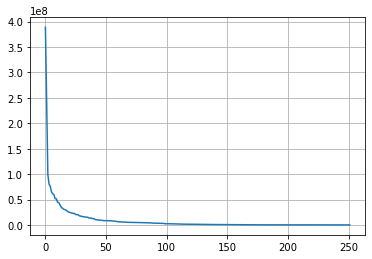

In [17]:
import matplotlib.pyplot as plt
amount_array = np.array(amount_list)
plt.plot(amount_array)
plt.grid()

#### __Extra 1: Analizar la distribución de los datos__

__A. Visualizamos el histograma de los datos__

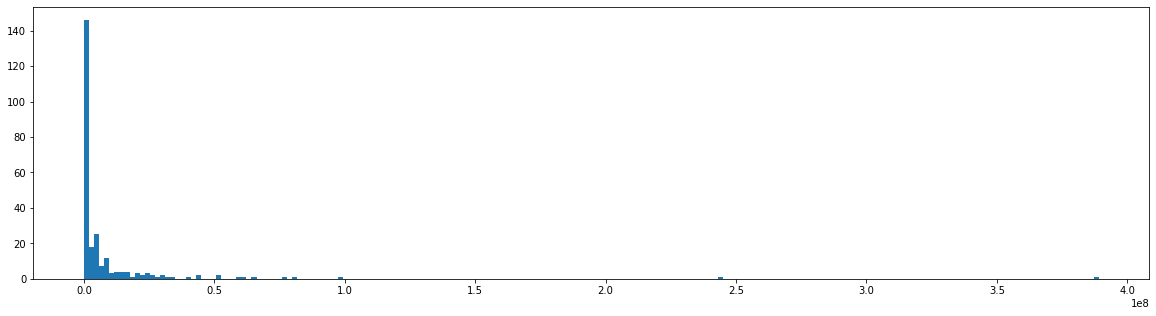

In [18]:
plt.figure(figsize=(20,5))
plt.hist(amount_array, bins=200)
plt.show()

__B. Aproximamos su curva de distribución (pdf)__

/tmp/ipykernel_155640/3323155800.py:3: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(np.array(amount_array), bw=0.5)


<AxesSubplot:ylabel='Density'>

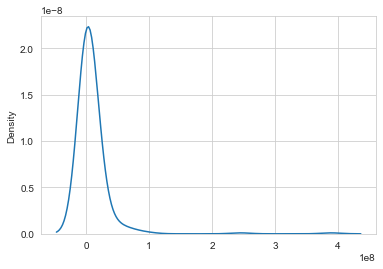

In [28]:
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(amount_array), bw=0.5)

#### Ejercicio 3: Acceder a una web más compleja para hacer minería de estructura
Vamos a acceder a una página para ver todos los enlaces que cuelgan de ella

__1. Accedemos a una web compleja, revisamos el estatus de petición y la parseamos con Beautiful Soup (tipo html)__

In [20]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

url = "https://tyris-software.com/"
resp = requests.get(url)
print(f"Web accedida: {url}")
print(f"status code = {resp.status_code}")
soup = BeautifulSoup(resp.text, 'html.parser')

Web accedida: https://tyris-software.com/
status code = 200


__2. Buscamos todos los tags que contengan el atributo href --> find_all(atributo=True)__

In [21]:
tags_with_href = soup.find_all(href=True)
print(f"Se han encontrado {len(tags_with_href)} tags que contienen el atributo 'href'\n")
print("Vemos el primero:")
print(tags_with_href[0])

Se han encontrado 107 tags que contienen el atributo 'href'

Vemos el primero:
<link href="https://gmpg.org/xfn/11" rel="profile"/>


__3. Analizamos los links, y nos quedamos con aquellos que cuelgan directamente de la página principal --> tag.get('atributo')__

In [22]:
links = []
for tag in tags_with_href:
    link = tag.get('href')
    if link.find(url)>=0:
        if link[-1] != "/":
            link = link+"/"
        links.append(link)
        print(link)
        
print(f"Hay {len(links)} enlances internos en la pagina principal")

https://tyris-software.com/
https://tyris-software.com/en/
https://tyris-software.com/
https://tyris-software.com/feed/
https://tyris-software.com/comments/feed/
https://tyris-software.com/wp-includes/css/dist/block-library/style.min.css?ver=5.6.10/
https://tyris-software.com/wp-includes/css/dist/block-library/theme.min.css?ver=5.6.10/
https://tyris-software.com/wp-content/plugins/complianz-gdpr/assets/css/cookieblocker.min.css?ver=6.3.4/
https://tyris-software.com/wp-content/plugins/header-footer-elementor/assets/css/header-footer-elementor.css?ver=1.6.13/
https://tyris-software.com/wp-content/plugins/elementor/assets/lib/eicons/css/elementor-icons.min.css?ver=5.14.0/
https://tyris-software.com/wp-content/plugins/elementor/assets/css/frontend-legacy.min.css?ver=3.5.6/
https://tyris-software.com/wp-content/plugins/elementor/assets/css/frontend.min.css?ver=3.5.6/
https://tyris-software.com/wp-content/uploads/elementor/css/post-1671.css?ver=1648475579/
https://tyris-software.com/wp-conte

__4. Eliminamos los enlaces repetidos__

In [23]:
import numpy as np
links_array = np.array(links)
unique_links = np.unique(links_array)
print(f"Hay {len(unique_links)} enlaces únicos:")
print(unique_links)

Hay 53 enlaces únicos:
['https://tyris-software.com/' 'https://tyris-software.com/academy/'
 'https://tyris-software.com/comments/feed/'
 'https://tyris-software.com/contacto-2/'
 'https://tyris-software.com/contacto/'
 'https://tyris-software.com/coste-plataforma-ott/'
 'https://tyris-software.com/en/' 'https://tyris-software.com/feed/'
 'https://tyris-software.com/industria/'
 'https://tyris-software.com/laboratorio/'
 'https://tyris-software.com/negocio/'
 'https://tyris-software.com/newsletter/'
 'https://tyris-software.com/noticias/'
 'https://tyris-software.com/servicios/'
 'https://tyris-software.com/television/'
 'https://tyris-software.com/terminos-y-condiciones/'
 'https://tyris-software.com/unete-al-equipo-tyris/'
 'https://tyris-software.com/wp-content/plugins/complianz-gdpr/assets/css/cookieblocker.min.css?ver=6.3.4/'
 'https://tyris-software.com/wp-content/plugins/elementor-pro/assets/css/frontend.min.css?ver=3.6.4/'
 'https://tyris-software.com/wp-content/plugins/element

__5. Generamos el mapa de relaciones de enlaces y lo guardamos en un dataframe__

In [24]:
#Genero un dataframe vacío
sitemap_layers = pd.DataFrame()

#Genero la primera columna del dataframe eliminando todo lo que va antes de '//' y después del primer '/'
bases = pd.Series([url.split('//')[-1].split('/')[0] for url in unique_links])
sitemap_layers[0] = bases

# Indico cuántos niveles quiero bajar para hacer mi mapa y los recorro
layers = 3
for layer in range(1, layers+1):
    page_layer = []
    for url, base in zip(unique_links, bases):
        try:
            page_layer.append(url.split(base)[1].split('/')[layer])
        except:
            # There is nothing that deep!
            page_layer.append('')

    sitemap_layers[layer] = page_layer

display(sitemap_layers)

,0,1,2,3
0,tyris-software.com,,,
1,tyris-software.com,academy,,
2,tyris-software.com,comments,feed,
3,tyris-software.com,contacto-2,,
4,tyris-software.com,contacto,,
5,tyris-software.com,coste-plataforma-ott,,
6,tyris-software.com,en,,
7,tyris-software.com,feed,,
8,tyris-software.com,industria,,
9,tyris-software.com,laboratorio,,


#### __Extra 2: Visualizar el mapa de conexiones obtenido__

__A. Preparamos un dataframe sin duplicados y que cuente el número de enlaces__

In [25]:
# Buscar duplicados, agruparlos y contarlos
columns_list = list(sitemap_layers.columns)
sitemap_layers = sitemap_layers.groupby(columns_list)[0].count()\
                    .rename('counts').reset_index()\
                    .sort_values(columns_list, ascending=True)\
                    .reset_index(drop=True)


# Convertimos los nombres de columnas a formato texto (y guardamos el resultado en csv)
sitemap_layers.columns = [str(col) for col in sitemap_layers.columns]
sitemap_layers.to_csv('sitemap_layers.csv', index=False)

__B. Visualizamos con la libreria graphviz__

In [26]:
import graphviz
df = sitemap_layers
graph_depth = 3  # Number of layers deep to plot categorization
limit = 50       # Maximum number of nodes for a branch
size = '28,5'     # Size of rendered graph
skip = ''        # List of branches to restrict from expanding

# Initialize graph
f = graphviz.Digraph('sitemap', filename='sitemap_graph_%d_layer' % layers, format='%s' % 'pdf')
f.body.extend(['rankdir=LR', 'size="%s"' % size])


def add_branch(f, names, vals, limit, connect_to=''):
    ''' Adds a set of nodes and edges to nodes on the previous layer. '''

    # Get the currently existing node names
    node_names = [item.split('"')[1] for item in f.body if 'label' in item]

    # Only add a new branch it it will connect to a previously created node
    if connect_to:
        if connect_to in node_names:
            for name, val in list(zip(names, vals))[:limit]:
                f.node(name='%s-%s' % (connect_to, name), label=name)
                f.edge(connect_to, '%s-%s' % (connect_to, name), label='{:,}'.format(val))


f.attr('node', shape='rectangle') # Plot nodes as rectangles

# Add the first layer of nodes
for name, counts in df.groupby(['0'])['counts'].sum().reset_index().values:
    f.node(name=name, label='{} ({:,})'.format(name, counts))

f.attr('node', shape='oval') # Plot nodes as ovals
f.graph_attr.update()

# Loop over each layer adding nodes and edges to prior nodes
for i in range(1, layers+1):
    cols = [str(i_) for i_ in range(i)]
    nodes = df[cols].drop_duplicates().values
    for j, k in enumerate(nodes):

        # Compute the mask to select correct data
        mask = True
        for j_, ki in enumerate(k):
            mask &= df[str(j_)] == ki

        # Select the data then count branch size, sort, and truncate
        data = df[mask].groupby([str(i)])['counts'].sum().reset_index()

        # Add to the graph unless specified that we do not want to expand k-1
        if (not skip) or (k[-1] not in skip):
            add_branch(f,
                    names=data[str(i)].values,
                    vals=data['counts'].values,
                    limit=limit,
                    connect_to='-'.join(['%s']*i) % tuple(k))

    
f.graph_attr = {
        'fontname': 'Helvetica',
        'fontsize': '18',
        'fontcolor': 'black',
}

f.node_attr = {
        'style': 'filled',
        'color': 'black',
        'fillcolor': '#dbdddd',
        'fontname': 'Helvetica',
        'fontsize': '14',
        'fontcolor': 'black',
}
    
f.edge_attr = {
        'color': 'black',
        'arrowhead': 'open',
        'fontname': 'Helvetica',
        'fontsize': '12',
        'fontcolor': 'black',
    }

display(f)


ModuleNotFoundError: No module named 'graphviz'

In [ ]:
f.render(cleanup=True)